# 1. Import Library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier



from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# 2. Loading data

Unzip dataset

In [ ]:
with zipfile.ZipFile('/content/drive/MyDrive/Data Sciene Funix/Titanic/titanic.zip', 'r') as zip_ref:
    zip_ref.extractall('original_dataset')

Load CSV file into Dataframe

In [ ]:
train_df = pd.read_csv("/content/original_dataset/train.csv")
test_df = pd.read_csv("/content/original_dataset/test.csv")
gender_submission_df = pd.read_csv("/content/original_dataset/gender_submission.csv")

Train DF

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Test DF

In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Sample submission (Not real result)

In [ ]:
gender_submission_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# 3. Exploratory Data Analysis (EDA)

## 3.1 Data Information

Data Shape

In [ ]:
print("Train DF shape:", train_df.shape)
print("Test DF shape:", test_df.shape)

Train DF shape: (891, 12)
Test DF shape: (418, 11)


Data Columns

In [ ]:
print("Columns (features of the train dataset)")
train_df.columns

Columns (features of the train dataset)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
print("Columns (features of the test dataset)")
test_df.columns

Columns (features of the test dataset)


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Analyze Result: The test dataset does not contain 'Survived' column (Target). Our mission is to train the model on train dataset, use the model to predict the target class of test dataset, and submit on Kaggle to check model performance


---



Data Info

In [ ]:
print("Train Dataset Info:")
train_df.info()

Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
print("Test Dataset Info:")
test_df.info()

Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## 3.2 Label Exploration

In [ ]:
print("Labels: ", train_df['Survived'].unique())

Labels:  [0 1]


Analyze result: The label contain 2 value:
- 0: meaning passenger not survive
- 1: meaning passenger survive


---



Label distribution on train dataset

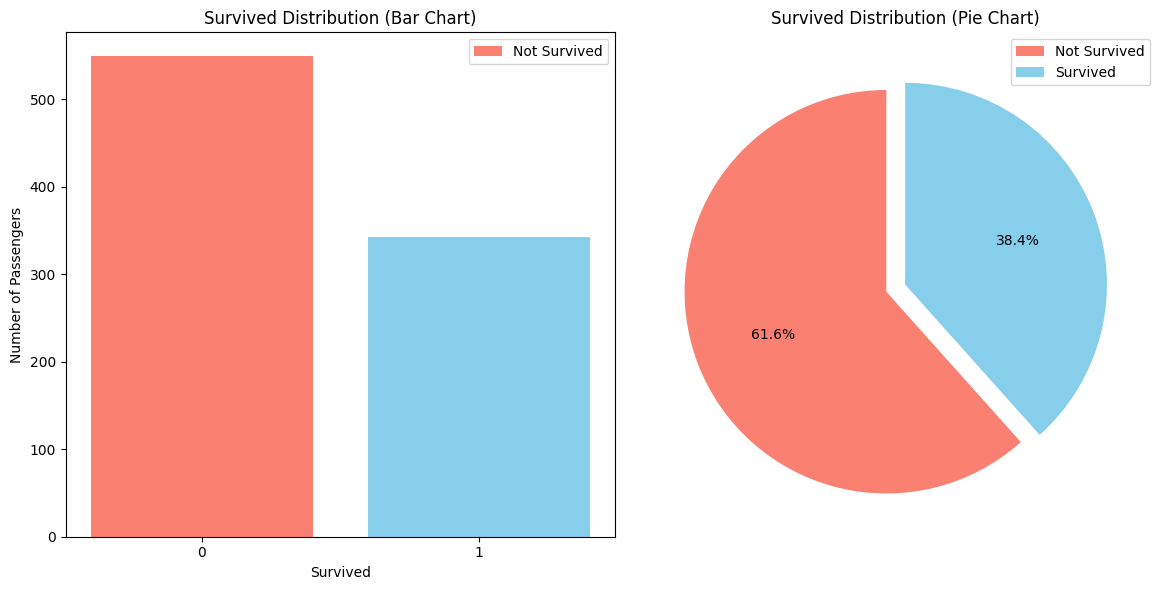

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar chart (subplot 1)
survived_counts = train_df['Survived'].value_counts()
axes[0].bar(survived_counts.index, survived_counts.values, color=['salmon', 'skyblue'])
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['0', '1'])
axes[0].set_title('Survived Distribution (Bar Chart)')
axes[0].set_xlabel('Survived')
axes[0].set_ylabel('Number of Passengers')

# Pie chart (subplot 2)
sizes = survived_counts.values
colors = ['salmon', 'skyblue']
explode = (0.1, 0)
axes[1].pie(sizes, explode=explode, colors=colors, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Survived Distribution (Pie Chart)')

# Add legends
axes[0].legend(['Not Survived', 'Survived'])
axes[1].legend(['Not Survived', 'Survived'])

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
print(sum(train_df['Survived']),'passengers survived out of', len(train_df))

342 passengers survived out of 891


## 3.3 Pclass Visualization

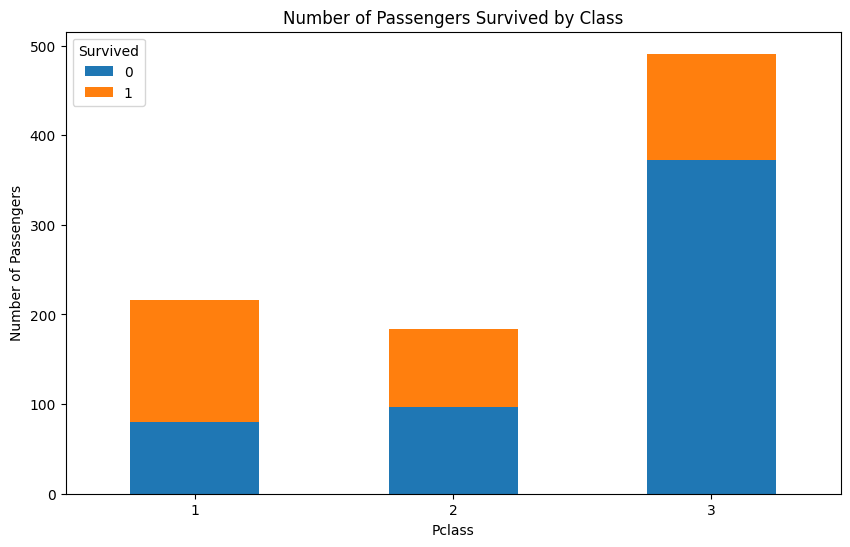

In [ ]:
survived_by_class = train_df.groupby('Pclass')['Survived'].value_counts()

survived_by_class.unstack().plot(kind='bar', stacked=True, figsize=(10,6))
plt.xlabel('Pclass')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers Survived by Class')
plt.xticks(rotation=0)
plt.show()


## 3.4 Sex Visualization


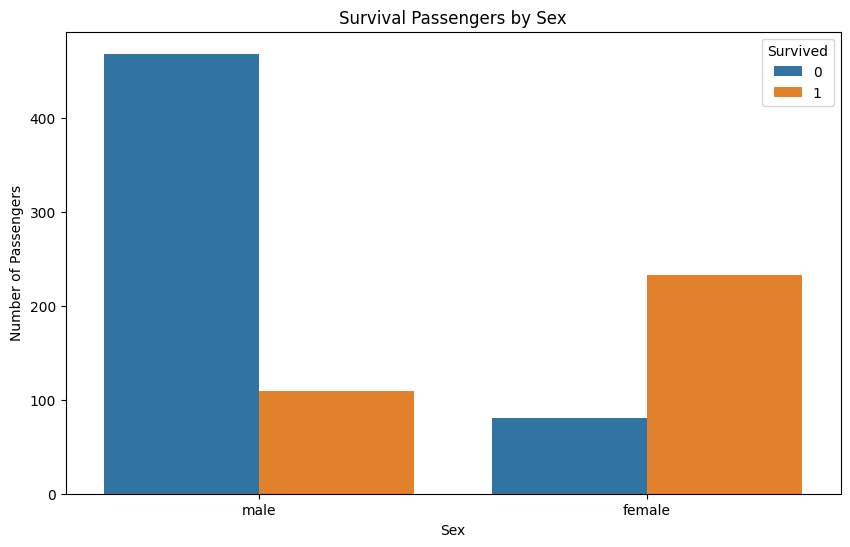

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="Sex", hue="Survived", data=train_df)
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.title('Survival Passengers by Sex')
plt.show()

## 3.5 Age Visualization

In [ ]:
def age_group_summary(df, age_groups):
    """Create a result summary for the different age groups."""
    # calculate the survival rates and counts for the different age groups
    age_survival = df[['AgeGroup', 'Survived']].groupby('AgeGroup').agg(['mean', 'count', 'sum'])

    # reindex to get the correct order in the calculated data frame
    age_survival = age_survival.reindex(age_groups)

    # change the column headers
    age_survival.columns = age_survival.columns.droplevel() # remove multilevel index
    age_survival.columns = ['Survival rate', 'Total', 'Survived']

    # create a new column containing the number of passengers that died
    age_survival['Died'] = age_survival['Total'] - age_survival['Survived']

    return age_survival

In [ ]:
# Copy train_df
train_age_df = train_df.copy()

# create a new age group column in the data frame
train_age_df['AgeGroup'] = 0

# labels for the different age groups
age_groups = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

# split the passengers into age groups of 10 years
train_age_df['AgeGroup'] = pd.cut(train_age_df['Age'], range(0, 90, 10), labels=age_groups)

# calculate the survival rates for the different age groups
age_survival = age_group_summary(train_age_df, age_groups)

age_survival

,Survival rate,Total,Survived,Died
AgeGroup,,,,
0-10,0.593750,64,38,26
11-20,0.382609,115,44,71
21-30,0.365217,230,84,146
31-40,0.445161,155,69,86
41-50,0.383721,86,33,53
51-60,0.404762,42,17,25
61-70,0.235294,17,4,13
71-80,0.200000,5,1,4


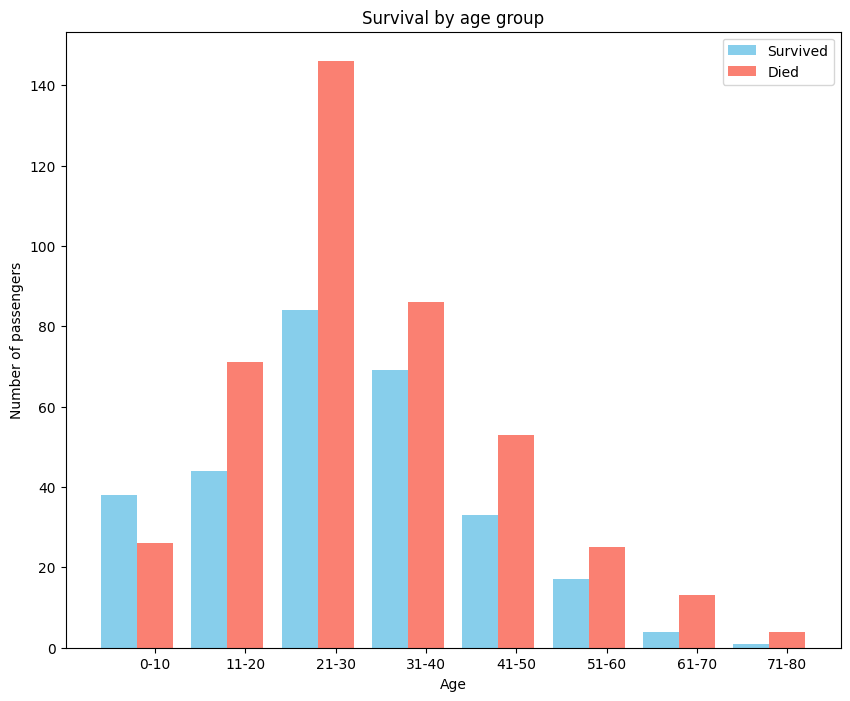

In [ ]:
# vector for the bar positions
ind = np.arange(len(age_survival))

# bar width
width = 0.4

# bar plot
fig, ax = plt.subplots(figsize=(10, 8))  # Set the desired figure size here

survived = age_survival['Survived'].values
bar1 = ax.bar(ind, survived, width=width, color='skyblue', label='Survived')

died = age_survival['Died'].values
bar2 = ax.bar(ind + width, died, width=width, color='salmon',
              label='Died')

# format plot
ax.set(xlabel='Age', xticks=(ind + width), xticklabels=age_groups, ylabel='Number of passengers',
       title='Survival by age group')
plt.legend()

plt.show()


## 3.6 Siblings/Spouses Visualization

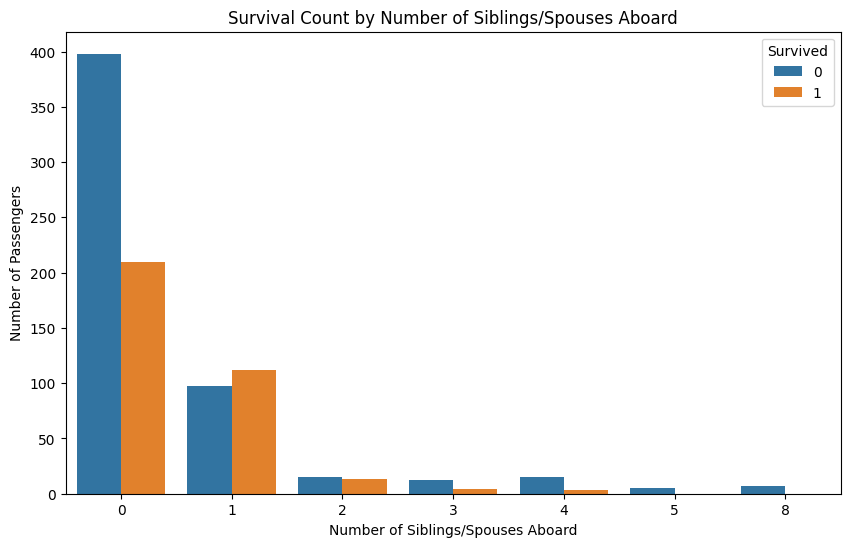

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="SibSp", hue="Survived", data=train_df)
plt.xlabel('Number of Siblings/Spouses Aboard')
plt.ylabel('Number of Passengers')
plt.title('Survival Count by Number of Siblings/Spouses Aboard')
plt.show()


## 3.7 Parents/Children Visualization

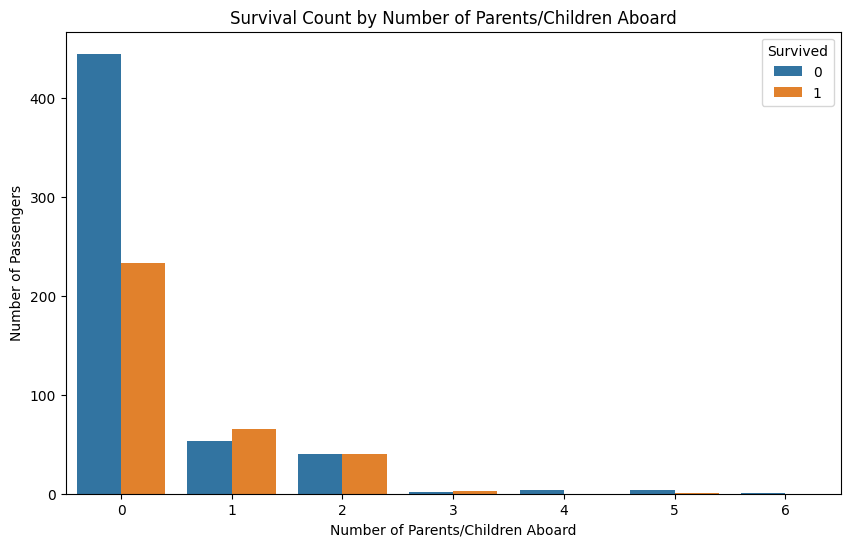

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="Parch", hue="Survived", data=train_df)
plt.xlabel('Number of Parents/Children Aboard')
plt.ylabel('Number of Passengers')
plt.title('Survival Count by Number of Parents/Children Aboard')
plt.show()


## 3.8 Fare Visualization

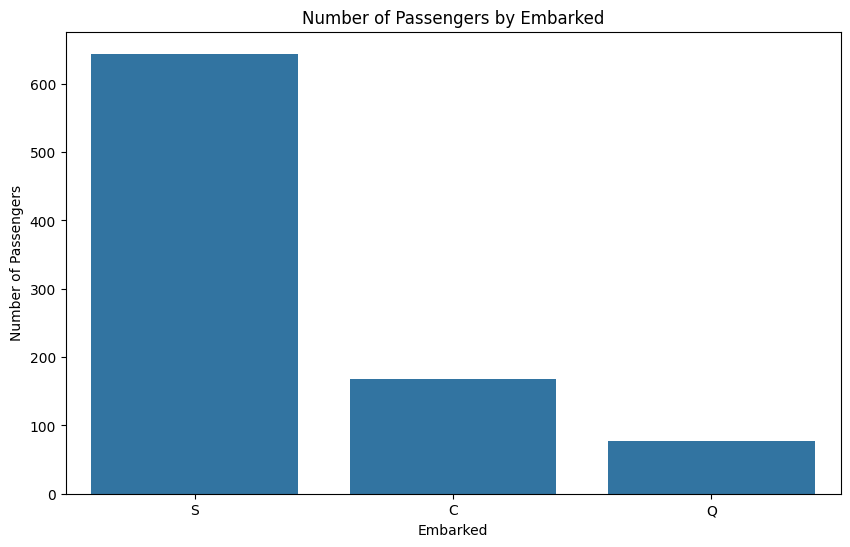

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', data=train_df)
plt.xlabel('Embarked')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers by Embarked')
plt.show()

## 3.9 Missing Data & Dupliaced Data



---


Check duplicated data in train_df

In [ ]:
duplicated_values_train = train_df.duplicated().sum()
print("Duplicated values in the training dataset:")
print(duplicated_values_train)

Duplicated values in the training dataset:
0




---


Check missing data in train_df and test_df

In [ ]:
missing_values_train = train_df.isnull().sum()
print("Missing values in the training dataset:")
print(missing_values_train)

missing_values_test = test_df.isnull().sum()
print("\nMissing values in the test dataset:")
print(missing_values_test)

Missing values in the training dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values in the test dataset:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64




---


- Train DF: There are 3 columns containing missing value:
-- 'Age': 177 missing values
-- 'Cabin': 687 missing values
-- 'Embark': 2 missing values

- Test DF: There are 3 columns containing missing value:
-- 'Age': 86 missing values
-- 'Cabin': 327 missing values
-- 'Fare': 1 missing values

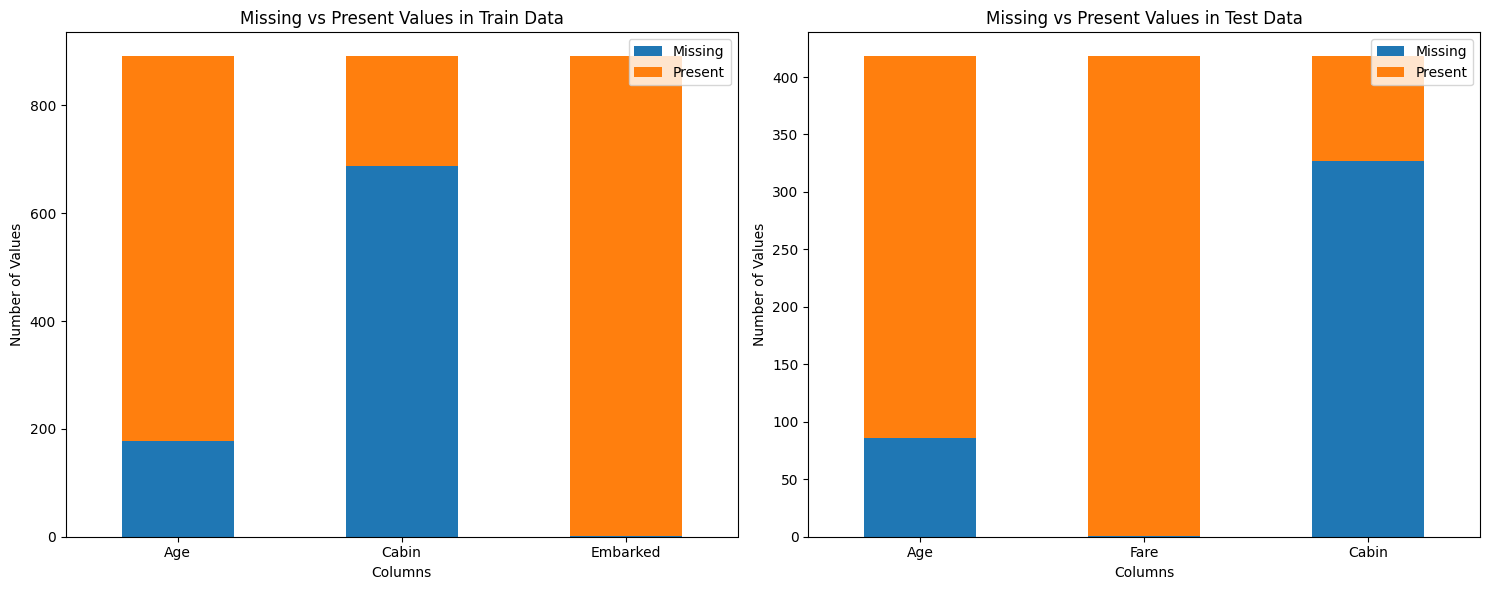

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

################ Train data missing values #####################

# Total number of values in train_df
total_values_train = train_df.shape[0]

# Sum of missing value in each column
missing_values_train = train_df.isnull().sum()

# Get columns containing missing value
columns_with_missing_train = missing_values_train[missing_values_train > 0].index

# Create new datafarme for missing value in train_df
missing_and_total_train = pd.DataFrame({
    'Missing': missing_values_train[columns_with_missing_train],
    'Present': total_values_train - missing_values_train[columns_with_missing_train]
})

# Missing value train_df plot
missing_and_total_train.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Missing vs Present Values in Train Data')
axes[0].set_xlabel('Columns')
axes[0].set_ylabel('Number of Values')
axes[0].set_xticklabels(columns_with_missing_train, rotation=0)


################ Test data missing values ######################

# Total number of values in test_df
total_values_test = test_df.shape[0]

# Sum of missing value in each column
missing_values_test = test_df.isnull().sum()

# Get columns containing missing value
columns_with_missing_test = missing_values_test[missing_values_test > 0].index

# Create new datafarme for missing value in test_df
missing_and_total_test = pd.DataFrame({
    'Missing': missing_values_test[columns_with_missing_test],
    'Present': total_values_test - missing_values_test[columns_with_missing_test]
})

# Missing value test_df plot
missing_and_total_test.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Missing vs Present Values in Test Data')
axes[1].set_xlabel('Columns')
axes[1].set_ylabel('Number of Values')
axes[1].set_xticklabels(columns_with_missing_test, rotation=0)

plt.tight_layout()
plt.show()

It is showed that both train_df and test_df contain a significant amount of missing data in 'Cabin' columns. The 'Age' column in train_df and test_df contains less than 200 missing values. To deal with this, here are the strategies:

- Drop 'Cabin' column in both train_df and test_df
- Calculate the mean of 'Age' column value to fill in missing value of 'Age' column
- 'Embark' train_df: Fill in the missing value with the most frequent class
- 'Fare' test_df: Fill in the missing value with the mean of 'Fare' value

# 4. Data Preparation

## 4.1 Train DF Missing Value



---


Drop 'Cabin' column

In [ ]:
train_df.drop('Cabin', axis = 1, inplace = True)



---


Fill in 'Embark' with most frequent value

In [ ]:
train_df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [ ]:
train_df['Embarked'].fillna('S', inplace=True)



---


Fill in 'Age' with mean value

In [ ]:
mean_age_train = train_df['Age'].mean()
train_df['Age'] = train_df['Age'].fillna(mean_age_train)

## 4.2 Test DF Missing Value

---
Drop 'Cabin' column



In [ ]:
test_df.drop('Cabin', axis = 1, inplace = True)



---


Fill in 'Fare' with mean value

In [ ]:
mean_fare = test_df["Fare"].mean()
mean_fare

35.627188489208635

In [ ]:
test_df["Fare"].fillna(mean_fare, inplace=True)



---


Fill in 'Age' with mean value

In [ ]:
mean_age_test = test_df['Age'].mean()
test_df['Age'] = test_df['Age'].fillna(mean_age_test)

## 4.3 Data Preprocessing

### 4.3.1 'Name' column extract title



---


Function to extract the title in 'Name' column

In [ ]:
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if big_string.find(substring) != -1:
            return substring
    print(big_string)
    return np.nan

---
Function to replace with more common title


In [ ]:
def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title



---

List of title

In [ ]:
title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                    'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                    'Don', 'Jonkheer']

---
'Name' column extract title


In [ ]:
train_df['Title']=train_df['Name'].map(lambda x: substrings_in_string(x, title_list))
test_df['Title']=test_df['Name'].map(lambda x: substrings_in_string(x, title_list))

List of title match

In [ ]:
train_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Mlle', 'Col', 'Capt', 'Countess', 'Jonkheer'],
      dtype=object)

Create 'Title' column

In [ ]:
train_df['Title']=train_df.apply(replace_titles, axis=1)
test_df['Title']=test_df.apply(replace_titles, axis=1)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


### 4.3.2 Drop unnecessary columns

Drop 'Name' column

In [ ]:
train_df.drop('Name', axis = 1, inplace = True)
test_df.drop('Name', axis = 1, inplace = True)

Drop 'PassengerId' in train_df

In [ ]:
train_df.drop('PassengerId', axis=1, inplace=True)

Drop 'Ticket' column for base model & use another dataframe for base model

In [ ]:
train_base_df = train_df.drop(columns=['Ticket'], axis=1)
test_base_df = test_df.drop(columns=['Ticket'], axis=1)

In [ ]:
train_base_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


## 4.4 Correlation Matrix

In [ ]:
df_corr = train_base_df.copy()

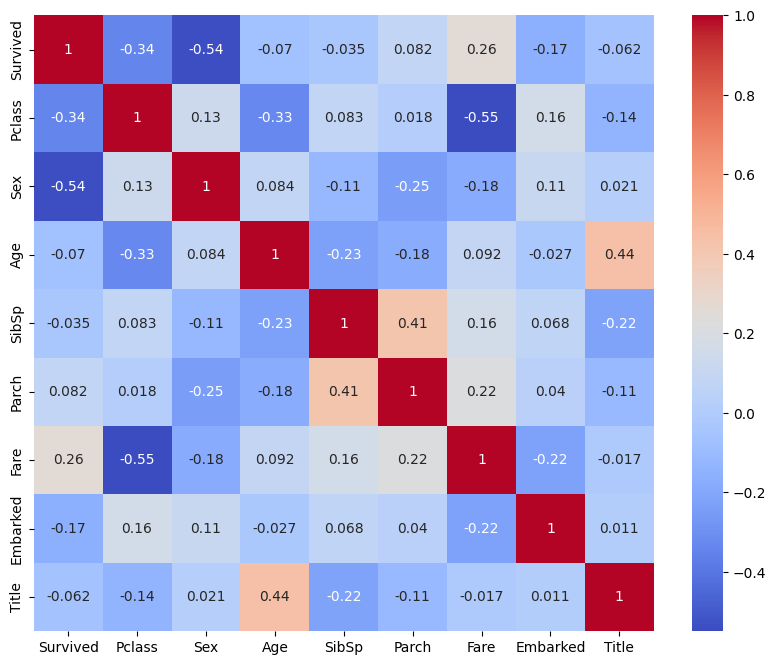

In [ ]:
# Categorical cols
categorical_columns = ['Sex', 'Title', 'Embarked']

# Convert categorical into numerical to visualize
for col in categorical_columns:
    df_corr[col] = df_corr[col].astype('category').cat.codes

# Correlation Matrix
corr_matrix = df_corr.corr()

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


Correlation Matrix ranking with 'Survived' (Target Column)

In [ ]:
correlation_with_survived = corr_matrix['Survived'].abs().sort_values(ascending=False)

# Print the sorted correlations
print(correlation_with_survived)

Survived    1.000000
Sex         0.543351
Pclass      0.338481
Fare        0.257307
Embarked    0.167675
Parch       0.081629
Age         0.069809
Title       0.062139
SibSp       0.035322
Name: Survived, dtype: float64


# 5. Modelling & Evaluation

## 5.1 Features Selection
Based on the correlation matrix, choosing the first 4 highest scores (exclude 'Survived' (Target Column) will be suitable approach for base model:
- Sex
- Pclass
- Fare
- Embarked


---



In [ ]:
train_base_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [ ]:
test_base_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,male,34.5,0,0,7.8292,Q,Mr
1,893,3,female,47.0,1,0,7.0000,S,Mrs
2,894,2,male,62.0,0,0,9.6875,Q,Mr
3,895,3,male,27.0,0,0,8.6625,S,Mr
4,896,3,female,22.0,1,1,12.2875,S,Mrs


In [ ]:
# Features chosen
base_features = ['Pclass', 'Sex', 'Fare', 'Embarked']

# Extract features on train
X_base = train_base_df[base_features]
y_base = train_base_df['Survived']

# Extract features on test
X_test_base = test_base_df[base_features]

## 5.2 Function Model Training & Prediction

### 5.2.1 Model With GridSearchCV Function

In [ ]:
def create_base_gridSearch(num_cols, cat_cols, model, param_grid, X):
  # Define numerical and categorical columns
  numerical_cols = num_cols
  categorical_cols = cat_cols

  # Ensure all required columns are present in the training data
  required_cols = numerical_cols + categorical_cols

  missing_cols = set(required_cols) - set(X.columns)
  if missing_cols:
      raise ValueError(f"Missing columns in training data: {missing_cols}")

  # Preprocessing steps
  numerical_transformer = StandardScaler()
  categorical_transformer = Pipeline(steps=[
      ('onehot', OneHotEncoder(handle_unknown='ignore'))
  ])

  # Bundle preprocessing for numerical and categorical data
  preprocessor = ColumnTransformer(
      transformers=[
          ('num', numerical_transformer, numerical_cols),
          ('cat', categorical_transformer, categorical_cols)
      ])

  # Create the pipeline
  pipeline = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('model', model)
  ])

  # Perform grid search
  grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy')

  return grid_search

### 5.2.2 Prediction & Saving Function

In [ ]:
def predict_and_save_result(model, test_df_input, X_test_input, output_path):
  preds = model.predict(X_test_input)

  output = pd.DataFrame({'PassengerId': test_df_input.PassengerId, 'Survived': preds})
  output.to_csv(output_path, index=False)
  print('Your submission was successfully saved!')

## 5.3 Logistic Regression

### 5.3.1 Logistic Regression Base

Base model training

In [ ]:
# Column list
base_numerical_cols = ['Fare']
base_categorical_cols = ['Pclass', 'Sex', 'Embarked']

# Ensure all required columns are present in the training data
required_cols = base_numerical_cols + base_categorical_cols

missing_cols = set(required_cols) - set(X_base.columns)
if missing_cols:
    raise ValueError(f"Missing columns in training data: {missing_cols}")

# Preprocessing steps
numerical_transformer = StandardScaler()
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, base_numerical_cols),
        ('cat', categorical_transformer, base_categorical_cols)
    ])

# Create the pipeline
base_lg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(penalty='l2', max_iter=500))
])

# Model Training
base_lg_pipeline.fit(X_base, y_base)

# Cross validation score
base_cv_score = cross_val_score(base_lg_pipeline, X_base, y_base, cv=10).mean()
print('Cross validation score: {:.3f}'.format(base_cv_score))

Cross validation score: 0.780


Model prediction on test dataset and save model

In [ ]:
# Saving path
base_lg_path = '/content/drive/MyDrive/Data Sciene Funix/Final_Project/submission/Base/base_lg_submission.csv'

# Predict and save result on Google Drive
predict_and_save_result(base_lg_pipeline, test_base_df, X_test_base, base_lg_path)

Your submission was successfully saved!




---


Result on Kaggle

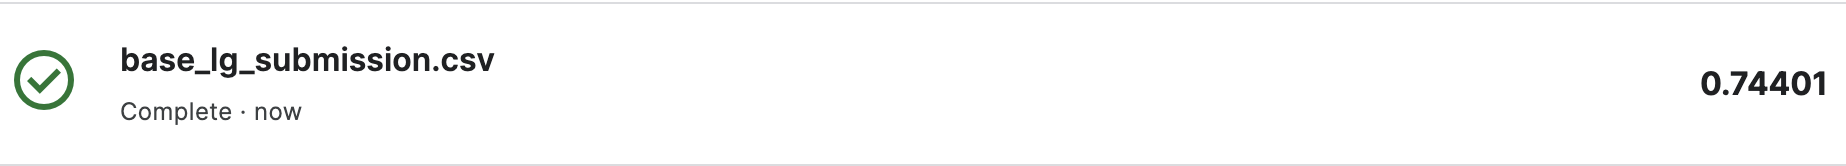

### 5.3.2 Logistic Regression Tuning

Logistic Regression Model with GridSearchCV

In [ ]:
# Create a Logistic Regression model
lg_model = LogisticRegression(penalty='l2')

  # Define hyperparameter grid for GridSearchCV
lg_param_grid = {
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'model__max_iter': [500, 700, 900],
    'model__solver': ['sag', 'saga', 'lbfgs']
}

# Logistic Regression GridSearchCV
lg_grid_search = create_base_gridSearch(base_numerical_cols, base_categorical_cols, lg_model, lg_param_grid, X_base)

Model Training

In [ ]:
# Model Training
lg_grid_search.fit(X_base, y_base)

# Get best hyperparameters
lg_best_params = lg_grid_search.best_params_
print(f"Best hyperparameters: {lg_best_params}")

# Evaluate using cross-validation
lg_cv_score = lg_grid_search.best_score_
print(f'Cross validation score (Logistic Regression): {lg_cv_score:.3f}')

Best hyperparameters: {'model__C': 0.01, 'model__max_iter': 500, 'model__solver': 'sag'}
Cross validation score (Logistic Regression): 0.781


Model with best parameters

In [ ]:
best_lg = lg_grid_search.best_estimator_

Model prediction on test dataset and save model

In [ ]:
# Saving path
tuning_lg_path = '/content/drive/MyDrive/Data Sciene Funix/Final_Project/submission/Base/tuning_lg_submission.csv'

# Predict and save result on Google Drive
predict_and_save_result(best_lg, test_base_df, X_test_base, tuning_lg_path)

Your submission was successfully saved!




---


Result on Kaggle

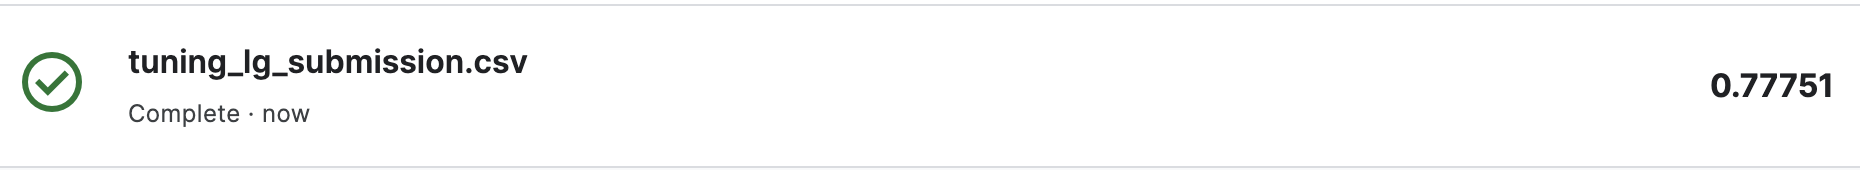

### 5.2.3 Model Comparision

Plotting Model Performance Comparision Function

In [2]:
# Function to compare models' performances
def plotting_models_comparison(models, cross_validation_scores, kaggle_accuracy_scores, benchmark):
  # Creating a bar chart
  x = np.arange(len(models))  # the label locations
  width = 0.35  # the width of the bars

  fig, ax = plt.subplots()

  # Colors for bars
  colors_cv = 'skyblue'
  colors_ka = 'lightcoral'

  # Plotting the bars with new colors
  rects1 = ax.bar(x - width/2, cross_validation_scores, width, label='Cross Validation Score', color=colors_cv)
  rects2 = ax.bar(x + width/2, kaggle_accuracy_scores, width, label='Kaggle Accuracy Score', color=colors_ka)

  # Adding the benchmark line
  ax.axhline(y=benchmark, color='green', linestyle='--', label='Benchmark (0.80861)')

  # Adding text annotations for each bar with vertical offset
  for rect in rects1:
      height = rect.get_height()
      ax.annotate(f'{height:.3f}',
                  xy=(rect.get_x() + rect.get_width() / 2, height),
                  xytext=(0, 1),  # 5 points vertical offset
                  textcoords="offset points",
                  ha='center', va='bottom', fontsize=8)

  for rect in rects2:
      height = rect.get_height()
      ax.annotate(f'{height:.5f}',
                  xy=(rect.get_x() + rect.get_width() / 2, height),
                  xytext=(0, 1),  # 5 points vertical offset
                  textcoords="offset points",
                  ha='center', va='bottom', fontsize=8)

  # Setting y-axis limit to 1.0
  ax.set_ylim(0, 1.0)

  # Add labels and title
  ax.set_xlabel('Model')
  ax.set_ylabel('Scores')
  ax.set_title('Model Comparison with Benchmark')
  ax.set_xticks(x)
  ax.set_xticklabels(models)
  ax.legend()

  # Adjust layout for better fit
  fig.tight_layout()

  # Set figure size
  fig.set_size_inches(10, 8)

  # Display the plot
  plt.show()

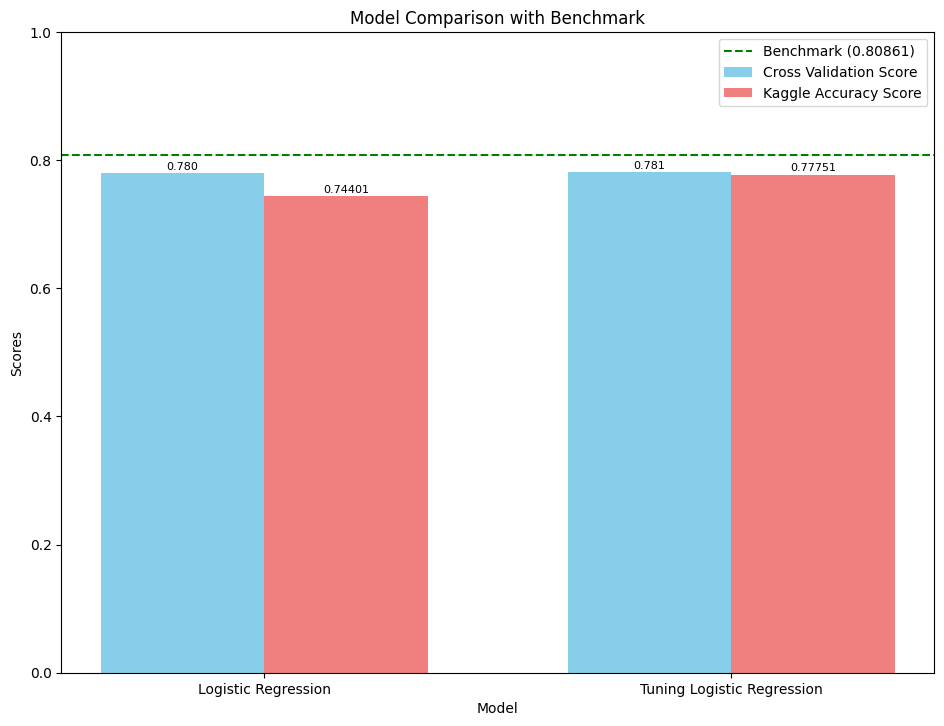

In [3]:
# Data from the table
models = ["Logistic Regression", "Tuning Logistic Regression"]
cross_validation_scores = [0.78, 0.781]
kaggle_accuracy_scores = [0.74401, 0.77751]
benchmark = 0.80861

# Plotting the models comparison
plotting_models_comparison(models, cross_validation_scores, kaggle_accuracy_scores, benchmark)


# 6. Model Improve

## 6.1 Decision Tree

Decision Tree Model with GridSearchCV

In [ ]:
# Create a Decision Tree model
dt_model = DecisionTreeClassifier()

# Define hyperparameter grid for GridSearchCV
dt_param_grid = {
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Perform grid search for Decision Tree
dt_grid_search = create_base_gridSearch(base_numerical_cols, base_categorical_cols, dt_model, dt_param_grid, X_base)

Model Training

In [ ]:
# Model Training
dt_grid_search.fit(X_base, y_base)

# Get best hyperparameters for Decision Tree
dt_best_params = dt_grid_search.best_params_
print(f"Best hyperparameters (Decision Tree): {dt_best_params}")

# Evaluate using cross-validation
dt_cv_score = dt_grid_search.best_score_
print(f'Cross validation score (Decision Tree): {dt_cv_score:.3f}')

Best hyperparameters (Decision Tree): {'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
Cross validation score (Decision Tree): 0.827


Model with best parameters

In [ ]:
best_dt = dt_grid_search.best_estimator_

Model prediction on test dataset and save model

In [ ]:
# Saving path
tuning_dt_path = '/content/drive/MyDrive/Data Sciene Funix/Final_Project/submission/Improve/tuning_dt_submission.csv'

# Predict and save result on Google Drive
predict_and_save_result(best_dt, test_base_df, X_test_base, tuning_dt_path)

Your submission was successfully saved!




---

Result on Kaggle

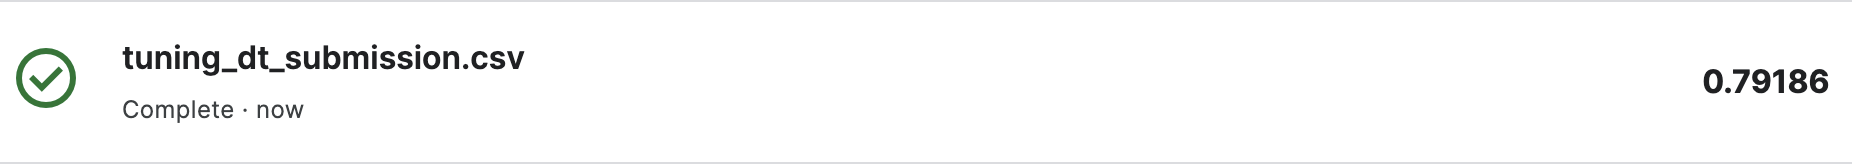

Model Performance Comparision

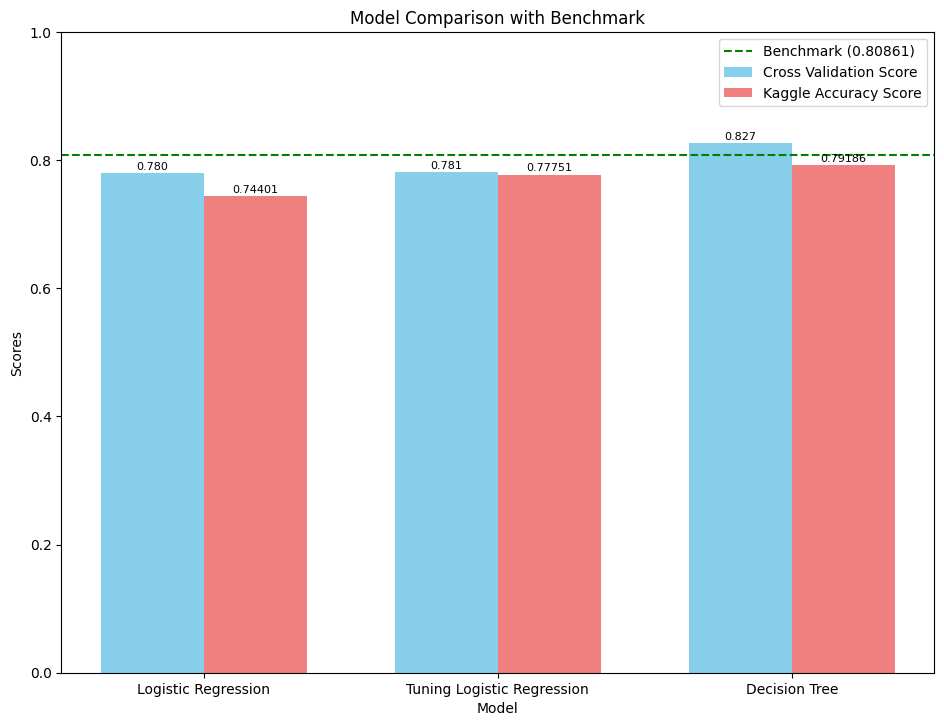

In [4]:
# Data from the table
models = ["Logistic Regression", "Tuning Logistic Regression", "Decision Tree"]
cross_validation_scores = [0.78, 0.781, 0.827]
kaggle_accuracy_scores = [0.74401, 0.77751, 0.79186]
benchmark = 0.80861


# Plotting the models comparison
plotting_models_comparison(models, cross_validation_scores, kaggle_accuracy_scores, benchmark)

## 6.2 Adding More Features

Since a passenger's chance of survival on the Titanic might have been influenced by their location on the ship, incorporating ticket information could enhance the model's data analysis. The ticket details might provide valuable insights into the passengers' positions, potentially improving the accuracy of the survival predictions

### 6.2.1 Dataframe original

In [ ]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1,1,female,35.0,1,0,113803,53.1000,S,Mrs
4,0,3,male,35.0,0,0,373450,8.0500,S,Mr


In [ ]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,Q,Mr
1,893,3,female,47.0,1,0,363272,7.0000,S,Mrs
2,894,2,male,62.0,0,0,240276,9.6875,Q,Mr
3,895,3,male,27.0,0,0,315154,8.6625,S,Mr
4,896,3,female,22.0,1,1,3101298,12.2875,S,Mrs


### 6.2.2 Ticket extract information

In [ ]:
# Extract Ticket First 2 Letters
train_df['Ticket_2letter'] = train_df.Ticket.apply(lambda x: x[:2])
test_df['Ticket_2letter'] = test_df.Ticket.apply(lambda x: x[:2])

# Extract Ticket Lenght
train_df['Ticket_len'] = train_df.Ticket.apply(lambda x: len(x))
test_df['Ticket_len'] = test_df.Ticket.apply(lambda x: len(x))

In [ ]:
# Drop 'Ticket' column
train_df.drop('Ticket', axis = 1, inplace = True)
test_df.drop('Ticket', axis = 1, inplace = True)

### 6.2.3 Dataframe with new columns

In [ ]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Ticket_2letter,Ticket_len
0,0,3,male,22.0,1,0,7.2500,S,Mr,A/,9
1,1,1,female,38.0,1,0,71.2833,C,Mrs,PC,8
2,1,3,female,26.0,0,0,7.9250,S,Miss,ST,16
3,1,1,female,35.0,1,0,53.1000,S,Mrs,11,6
4,0,3,male,35.0,0,0,8.0500,S,Mr,37,6


In [ ]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Ticket_2letter,Ticket_len
0,892,3,male,34.5,0,0,7.8292,Q,Mr,33,6
1,893,3,female,47.0,1,0,7.0000,S,Mrs,36,6
2,894,2,male,62.0,0,0,9.6875,Q,Mr,24,6
3,895,3,male,27.0,0,0,8.6625,S,Mr,31,6
4,896,3,female,22.0,1,1,12.2875,S,Mrs,31,7


## 6.3 Choosing Features

In [ ]:
# Features chosen
features = ['Pclass', 'Fare', 'Title', 'Ticket_len', 'Ticket_2letter']

# Extract features on train
X = train_df[features]
y = train_df['Survived']

# Extract features on test
X_test = test_df[features]

In [ ]:
X.head()

,Pclass,Fare,Title,Ticket_len,Ticket_2letter
0,3,7.2500,Mr,9,A/
1,1,71.2833,Mrs,8,PC
2,3,7.9250,Miss,16,ST
3,1,53.1000,Mrs,6,11
4,3,8.0500,Mr,6,37


## 6.4 Random Forest

Model Training

In [ ]:
# New columns list
improve_numerical_cols = ['Fare']
improve_categorical_cols = ['Pclass', 'Title', 'Ticket_len', 'Ticket_2letter']

# Ensure all required columns are present in the training data
required_cols = improve_numerical_cols + improve_categorical_cols

missing_cols = set(required_cols) - set(X.columns)
if missing_cols:
    raise ValueError(f"Missing columns in training data: {missing_cols}")

# Preprocessing for numerical and categorical data
numerical_transformer = StandardScaler()
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, improve_numerical_cols),
        ('cat', categorical_transformer, improve_categorical_cols)
    ])

# Bundle preprocessing and modeling code
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=0, n_estimators=500, max_depth=5))
])

# Training
rf_pipeline.fit(X,y)

# Average cross validation score
cv_score = cross_val_score(rf_pipeline, X, y, cv=10).mean()
print('Cross validation score: {:.3f}'.format(cv_score))

Cross validation score: 0.815


Model prediction on test dataset and save model

In [ ]:
# Saving path
rf_path = '/content/drive/MyDrive/Data Sciene Funix/Final_Project/submission/Improve/rf_submission.csv'

# Predict and save result on Google Drive
predict_and_save_result(rf_pipeline, test_df, X_test, rf_path)

Your submission was successfully saved!




---

Result on Kaggle

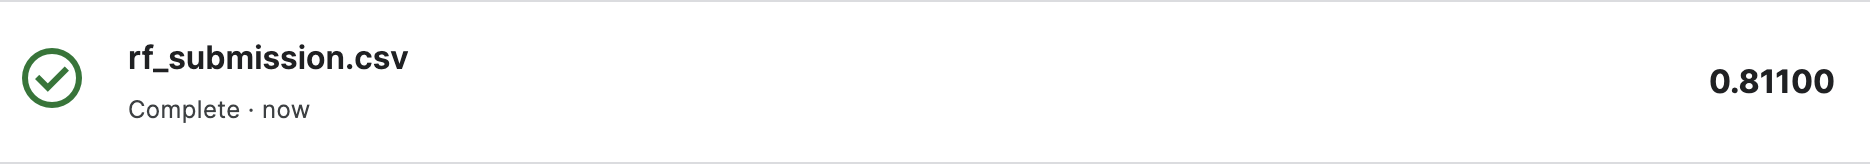

# 7. Final Model

## Model Accuracy Score Summary

<table border="1">
  <tr>
    <th>Model</th>
    <th>Cross Validation Score</th>
    <th>Kaggle Accuracy Score</th>
  </tr>
  <tr>
    <td>Base Logistic Regression</td>
    <td>0.780</td>
    <td>0.74401</td>
  </tr>
  <tr>
    <td>Tuning Logistic Regression</td>
    <td>0.781</td>
    <td>0.77751</td>
  </tr>
  <tr>
    <td>Tuning Decision Tree</td>
    <td>0.827</td>
    <td>0.79186</td>
  </tr>
  <tr>
    <td>Random Forest</td>
    <td>0.815</td>
    <td>0.81100</td>
  </tr>
</table>


---




Table To Compare Model Performance

In [ ]:
mode_score_dict = {
    'Model': ['Base Logistic Regression', 'Tuning Logistic Regression', 'Tuning Decision Tree', 'Random Forest'],
    'Cross Validation Score': [0.780, 0.781, 0.827, 0.815],
    'Kaggle Accuracy Score': [0.74401, 0.77751, 0.79186, 0.81100],
    'Satisfy Criteria (accuracy score >= 0.80861)': ['False', 'False', 'False', 'True']
}

# Create the DataFrame
model_score_df = pd.DataFrame(mode_score_dict)

# Print the DataFrame
model_score_df

,Model,Cross Validation Score,Kaggle Accuracy Score,Satisfy Criteria (accuracy score >= 0.80861)
0,Base Logistic Regression,0.780,0.74401,False
1,Tuning Logistic Regression,0.781,0.77751,False
2,Tuning Decision Tree,0.827,0.79186,False
3,Random Forest,0.815,0.81100,True


Final Graph Model Performance

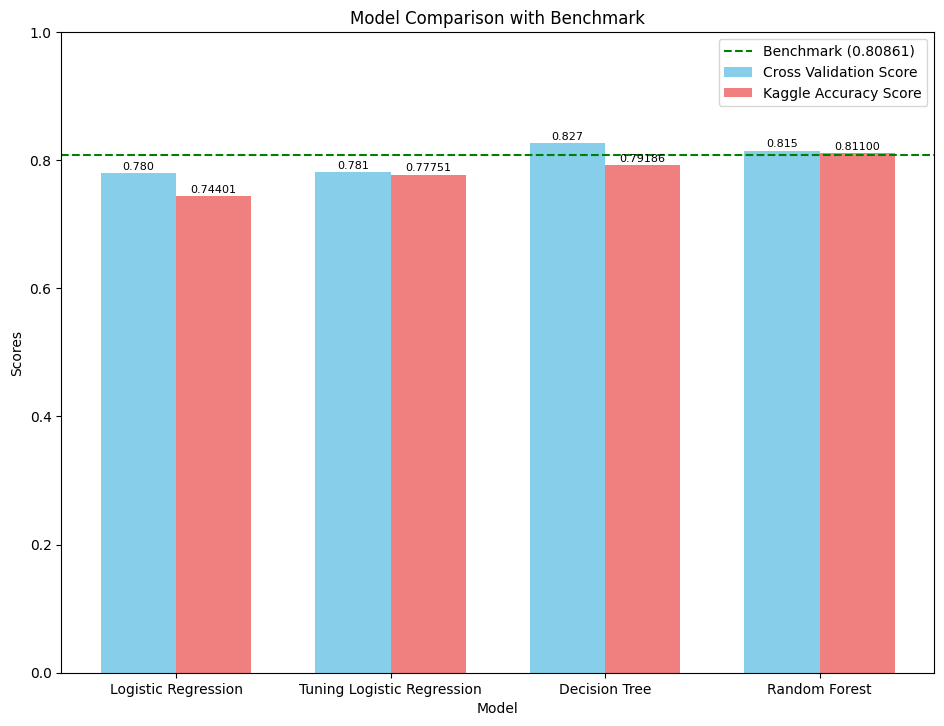

In [5]:
# Data from the table
models = ["Logistic Regression", "Tuning Logistic Regression", "Decision Tree", "Random Forest"]
cross_validation_scores = [0.78, 0.781, 0.827, 0.815]
kaggle_accuracy_scores = [0.74401, 0.77751, 0.79186, 0.81100]
benchmark = 0.80861

# Plotting the models comparison
plotting_models_comparison(models, cross_validation_scores, kaggle_accuracy_scores, benchmark)


## Kaggle Result & Final Ranking

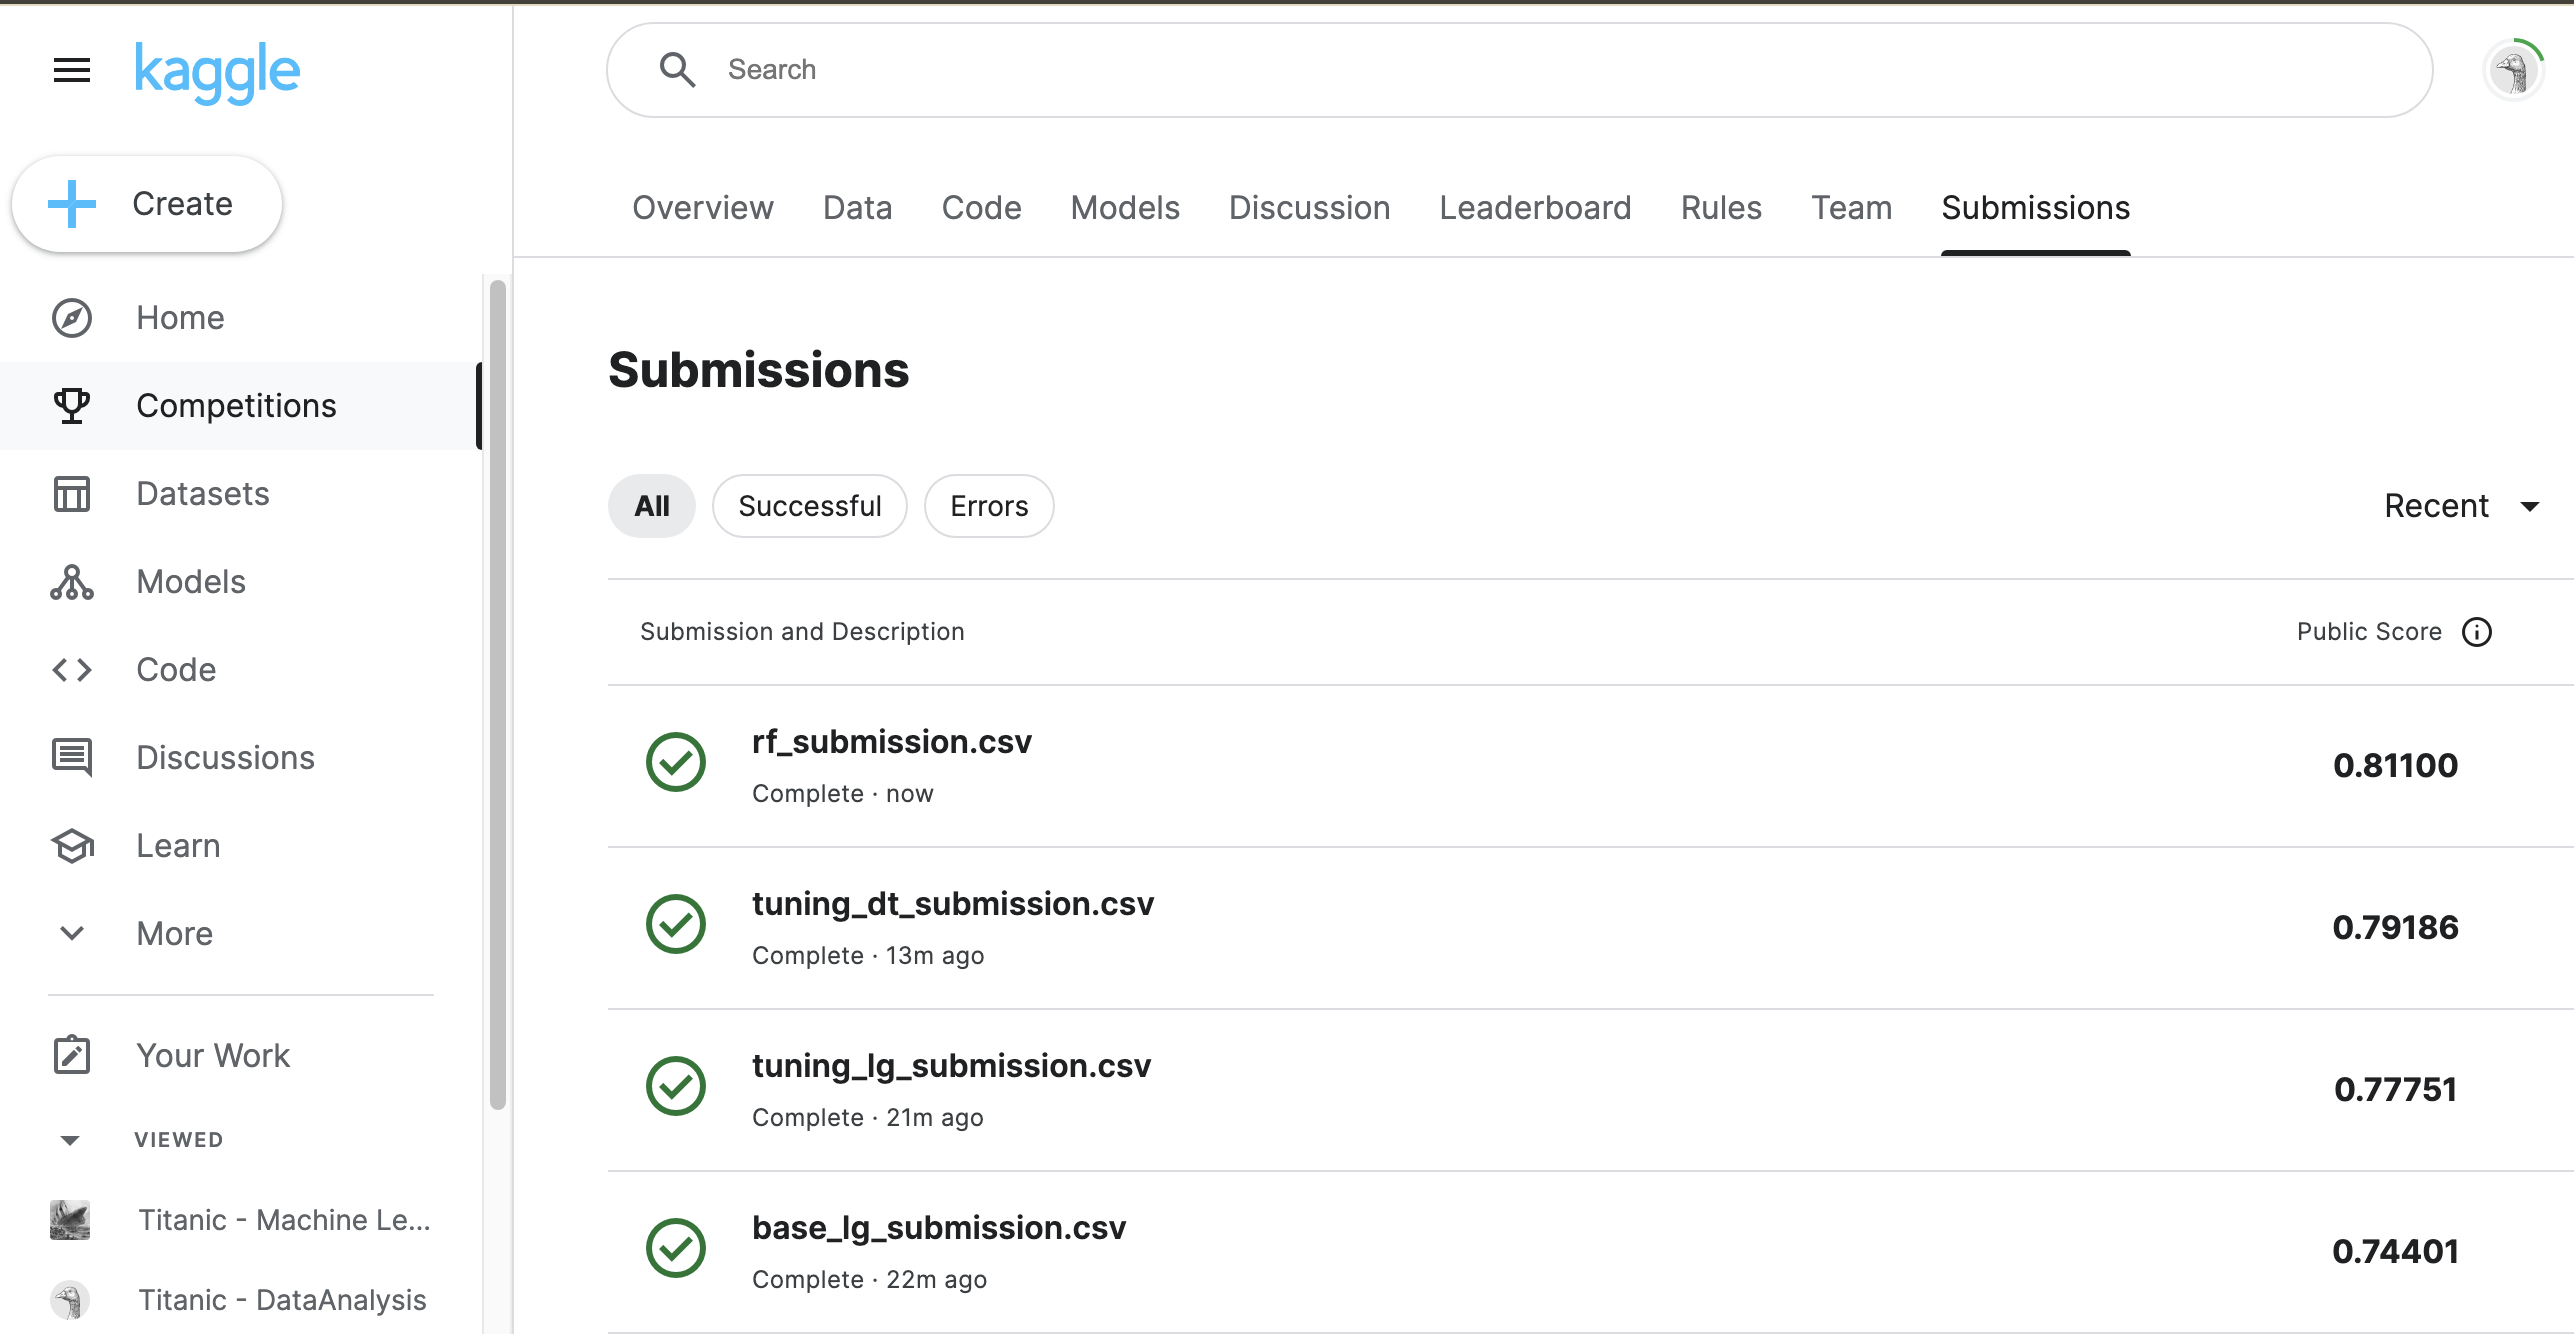

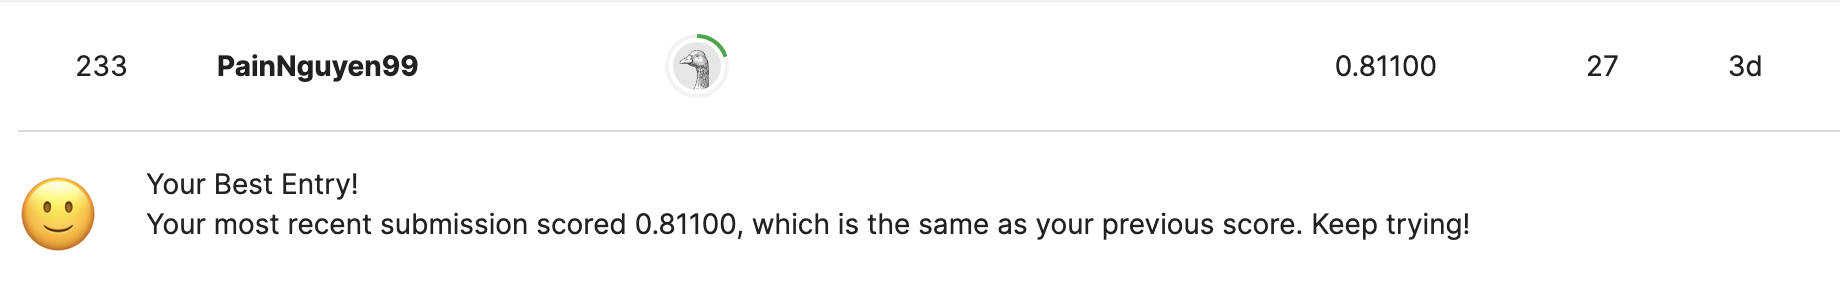



---

The Random Forest model, enhanced with newly created features in addition to the original ones, outperformed other models. Therefore, we selected the Random Forest model as our final choice.
